In [28]:
import math
from random import random
import numpy as np
from bisect import bisect_right, bisect_left
import matplotlib.pyplot as plt
%matplotlib inline

## Poisson distribution

In [29]:
def probability_poisson_distribution(k, lambda_val):
    return (lambda_val ** k) * math.exp(-lambda_val) / math.factorial(k)

## Geometric distribution

In [30]:
def probability_geometric_distribution(k, p):
    return p * (1-p)**(k) 

In [31]:
LAMBDA_VAL = 4 #for poisson
p = 0.2  #probability of success in geometric
n = 1000

#### Task1. Осуществить моделирование n = 1000 реализаций СВ из заданных дискретных распределений.

Алгоритм моделирования СВ из **распределения Пуассона**: 
1. Принимается $a = e^{–λ}$, b = 1 и i = 0. 

2. Генерируется псевдослучайное число $u_{i+1}$ ~ U(0, 1) из непрерывного равномерного распределения на отрезке (0, 1), после чего присваиваются значения $b = b·u_{i+1}$.

3. Если b < a, то возвращается значение x = i, в противном случае происходит переход к шагу 2 при i = i + 1.


In [32]:
def poisson_modeling(lambda_val):
    for _ in range(n):
        i = 0
        b = random()
    
        while b >= math.exp(-lambda_val):
            b *= random()
            i += 1
        
        yield i

In [33]:
poisson_random_values = list(poisson_modeling(LAMBDA_VAL))

Text(0, 0.5, '$pdf$')

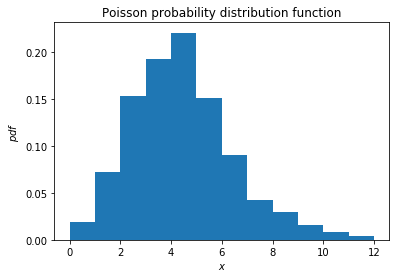

In [34]:
plt.hist(poisson_random_values, bins = 12, density=True)

plt.title('Poisson probability distribution function')
plt.xlabel('$x$')
plt.ylabel('$pdf$')

Алгоритм моделирования СВ из **геометрического распределения через испытания Бернулли**:
если данная вероятность успеха >= random(), то событие произошло и возвращаем количество успытаний Бернулли до успешного события, включая само успешное.    

In [35]:
def geometric_modeling_bernoulli(p):
    for _ in range(n):
        
        i = 1
        while p < random():
                i += 1
            
        yield i        

In [36]:
geometric_random_values_bernoulli = list(geometric_modeling_bernoulli(p))

Text(0, 0.5, '$pdf$')

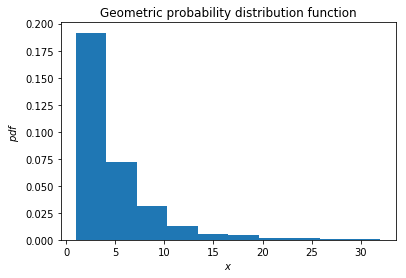

In [37]:
plt.hist(geometric_random_values_bernoulli, bins = 10, density=True)

plt.title('Geometric probability distribution function')
plt.xlabel('$x$')
plt.ylabel('$pdf$')

Алгоритм моделирования СВ из геометрического распределения прямым методом обратных функций:

1.	Моделирование реализации а БСВ.
2.	Принятие решения о том, что реализацией $\xi$ является значение x, определяемое соотношением: $$x=\biggl[\frac{ \ln a }{ \ln q } \biggr]$$
 
здесь [z] означает округление числа z в большую сторону до ближайшего целого значения.
Коэффициент использования БСВ k = 1.


In [38]:
def geometric_modeling(p):
    for _ in range(n):   
        
        a = random()            
        yield math.ceil(math.log(a) / math.log(1-p))

In [39]:
geometric_random_values = list(geometric_modeling(p))

Text(0, 0.5, '$pdf$')

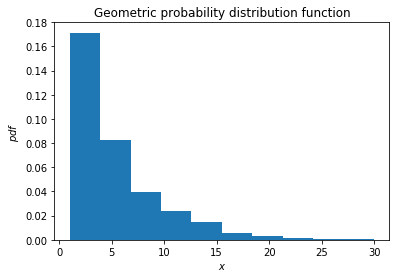

In [40]:
plt.hist(geometric_random_values, bins = 10, density=True)

plt.title('Geometric probability distribution function')
plt.xlabel('$x$')
plt.ylabel('$pdf$')

#### Task2. Вывести на экран несмещенные оценки математического ожидания и дисперсии, сравнить их с истинными значениями.

Values of math. expectetion and variance:

In [41]:
poisson_mathematical_expectation = LAMBDA_VAL
poisson_variance = LAMBDA_VAL

geometric_mathematical_expectation = 1 / p
geometric__variance = (1 - p) / p**2

Unbiased estimate of mathematical expectation of discrete random variable:
$$Unbiased\_estimate\_of\_math\_expectation = \frac{ \sum_{i=1}^n X_i }{ n }$$

In [42]:
def count_unbiased_estimate_of_math_expectation(variables_list):
    return sum(variables_list) / len(variables_list)

Unbiased variance estimate:
$$Unbiased\_variance\_estimate=\frac{ \sum_{i=1}^n (X_i - Unbiased\_estimate\_of\_math\_expectation)^{2}}{ n-1 }$$

In [43]:
def count_unbiased_variance_estimage(variables_list, unbiased_estimate_of_math_expectation):
    return sum((rand_var - unbiased_estimate_of_math_expectation)**2 for rand_var in variables_list) / (n - 1)

Show results:

In [44]:
def show_info(name, math_expectation, unbiased_estimate_of_math_exp, variance, unbiased_variance_estimage):
    print(name)
    print('E = {}'.format(math_expectation))
    print('Unbiased estimate of mathematical expectation = {}'.format(unbiased_estimate_of_math_exp))
    print('D = {}'.format(variance))
    print('Unbiased variance estimate = {}'.format(unbiased_variance_estimage))
    print()

In [45]:
unbiased_estimate_of_math_expectation_1 = count_unbiased_estimate_of_math_expectation(geometric_random_values_bernoulli)
unbiased_variance_estimage_1 = count_unbiased_variance_estimage(geometric_random_values_bernoulli, 
                                                             unbiased_estimate_of_math_expectation_1)
show_info('*****Geometric distribution through Bernoulli*****',
          geometric_mathematical_expectation,
          unbiased_estimate_of_math_expectation_1,
          geometric__variance,
          unbiased_variance_estimage_1)


unbiased_estimate_of_math_expectation_2 = count_unbiased_estimate_of_math_expectation(geometric_random_values)
unbiased_variance_estimage_2 = count_unbiased_variance_estimage(geometric_random_values, 
                                                             unbiased_estimate_of_math_expectation_2)
show_info('*****Geometric distribution*****',
          geometric_mathematical_expectation,
          unbiased_estimate_of_math_expectation_2,
          geometric__variance,
          unbiased_variance_estimage_2)


unbiased_estimate_of_math_expectation_poisson = count_unbiased_estimate_of_math_expectation(poisson_random_values)
unbiased_variance_estimage_poisson = count_unbiased_variance_estimage(poisson_random_values, 
                                                             unbiased_estimate_of_math_expectation_poisson)
show_info('*****Poisson distribution*****',
          poisson_mathematical_expectation,
          unbiased_estimate_of_math_expectation_poisson,
          poisson_variance,
          unbiased_variance_estimage_poisson)

*****Geometric distribution through Bernoulli*****
E = 5.0
Unbiased estimate of mathematical expectation = 4.837
D = 19.999999999999996
Unbiased variance estimate = 19.199630630630622

*****Geometric distribution*****
E = 5.0
Unbiased estimate of mathematical expectation = 5.028
D = 19.999999999999996
Unbiased variance estimate = 20.565781781781773

*****Poisson distribution*****
E = 4
Unbiased estimate of mathematical expectation = 3.946
D = 4
Unbiased variance estimate = 4.035119119119124



#### Task3. Для каждой из случайных величин построить свой χ2-критерием Пирсона с уровнем значимости ε=0.05. Проверить, что вероятность ошибки I рода стремится к 0.05.
#### Task4. Осуществить проверку каждой из сгенерированных выборок каждым из построенных критериев.

Распределение $\chi^2$ (хи-квадрат) с n степенями свободы — это распределение суммы квадратов n независимых стандартных нормальных случайных величин. http://www.machinelearning.ru/wiki/index.php?title=%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D1%85%D0%B8-%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82

Критерий Пирсона используется для проверки гипотезы $H_0$: "случайная величина X имеет распределение F(x)".

http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D1%85%D0%B8-%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82

Гипотетические вероятности попадания значений $\xi$ в ячейки гистограммы при истинной гипотезе $H_0$ и полностью заданной функции $F_0(x)$ равны: $$p_k = P\{\xi \in [x_{k-1}, x_k)\} = F_0(x_k) - F_0(x_{k-1}), k = \overline{1, K},$$
где $\{x_l\}(l=\overline{0, K})$ - границы ячеек гистограммы

Статистика критерия хи-квадрат: $$\chi^2=\sum_{i=1}^K \frac{\left(n_i- np_i\right)^2}{np_i}$$

Возьмем K = 10 - количество ячеек гистограммы(кол-во групп)

In [46]:
K = 10 #число ячеек гистограммы
delta_005_10 = 16.919

In [47]:
def count_discrete_frequencies(random_seq, K):
    
    min_el = min(random_seq)
    max_el = max(random_seq)
    
    step = math.floor((max_el - min_el) / K)
    
    intervals_values = list(range(min_el, max_el, step)) 
      
    frequencies = [0] * K
    
    sorted_random_seq = sorted(random_seq)
    
    last_position = 0
    for i in range(K - 1):
        position = bisect_left(sorted_random_seq, intervals_values[i + 1]) #obtain position of insertion
        frequencies[i] = position - last_position
        last_position = position

    frequencies[K - 1] = len(random_seq) - last_position

    return frequencies

In [48]:
def count_discrete_probabilities(random_seq, probability_f, *args):
    
    min_el = min(random_seq)
    max_el = max(random_seq)

    step = math.floor((max_el - min_el) / K)
        
    p = [sum(probability_f(j, *args) for j in range(i*step, (i+1)*step)) for i in range(K-1)]   
    p.append(1 - sum(p))

    return p

In [49]:
def pearson(frequencies, p, n, K, delta):
    chi_2 = sum([(frequencies[i] - n * p[i]) ** 2 / (n * p[i]) for i in range(K)])
    print("chi_2 = {}, delta = {}".format(chi_2, delta))
    return chi_2 < delta

Pearson check:

In [50]:
poisson_p = count_discrete_probabilities(poisson_random_values, probability_poisson_distribution, LAMBDA_VAL)
poisson_frequencies = count_discrete_frequencies(poisson_random_values, K)

print(poisson_p)
print(poisson_frequencies)
pearson(poisson_frequencies, poisson_p, n, K, delta_005_10)

[0.01831563888873418, 0.07326255555493671, 0.14652511110987343, 0.19536681481316456, 0.19536681481316456, 0.15629345185053165, 0.1041956345670211, 0.059540362609726345, 0.029770181304863173, 0.02136343448798428]
[19, 72, 153, 193, 221, 151, 90, 43, 30, 28]
chi_2 = 12.496990774330097, delta = 16.919


True

In [51]:
geometric_p_1 = count_discrete_probabilities(geometric_random_values_bernoulli, probability_geometric_distribution, p)
geometric_frequencies_1 = count_discrete_frequencies(geometric_random_values_bernoulli, K)

print(geometric_p_1)
print(geometric_frequencies_1)
pearson(geometric_frequencies_1, geometric_p_1, n, K, delta_005_10)

[0.4880000000000001, 0.24985600000000008, 0.12792627200000006, 0.06549825126400004, 0.033535104647168024, 0.01716997357935003, 0.008791026472627219, 0.004501005553985136, 0.0023045148436403903, 0.0024178516392290295]
[504, 254, 130, 51, 26, 14, 9, 7, 2, 3]
chi_2 = 7.687339409279145, delta = 16.919


True

In [52]:
geometric_p_2 = count_discrete_probabilities(geometric_random_values, probability_geometric_distribution, p)
geometric_frequencies_2 = count_discrete_frequencies(geometric_random_values, K)

print(geometric_p_2)
print(geometric_frequencies_2)
pearson(geometric_frequencies_2, geometric_p_2, n, K, delta_005_10)

[0.36000000000000004, 0.23040000000000005, 0.14745600000000003, 0.09437184000000004, 0.06039797760000003, 0.03865470566400002, 0.02473901162496002, 0.015832967439974414, 0.010133099161583625, 0.018014398509481833]
[375, 222, 140, 83, 61, 41, 29, 22, 8, 19]
chi_2 = 6.465820361264483, delta = 16.919


True